Challenge 1: Using this data, computer what fraction of total EU GHC emissions are attributable to agriculture as a whole.

In [220]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [92]:
agg_df = pd.read_csv(filepath_or_buffer="Agriculture_Dataset_text.csv", encoding_errors='ignore')
abb_df = pd.read_csv(filepath_or_buffer="ABBREV_2.csv", index_col=0)
abb_nutrient_map = pd.read_csv(filepath_or_buffer="abbrev_nutrient_map.csv", index_col=0)
daily_nutrients_df = pd.read_excel(io="daily_nutrients.xlsx")
mapping_df = pd.read_csv(filepath_or_buffer="mapping.csv")

The following code blocks will calculate the total EU GHC emissions for aggriculture 1961-2017 using the aggriculture dataset provided.

The following code block will create a dataframe which isolates the emissions columns for each category of aggriculture.

In [16]:
print(agg_df.columns)

agg_ghc = agg_df 

# Drop area and year 
agg_ghc = agg_ghc.drop(['Area', 'Year'], axis=1)

# Take every other column (emissions)
agg_ghc = agg_ghc[agg_ghc.columns[::2]]

# Add back area and year 
agg_ghc['Area'] = agg_df['Area']
agg_ghc['Year'] = agg_df['Year']

print(agg_ghc.columns)

Index(['Area', 'Year', 'Cereals excluding rice-Emissions (CO2eq)-kilotonnes',
       'Cereals excluding rice-Production-tonnes',
       'Eggs, hen, in shell-Emissions (CO2eq)-kilotonnes',
       'Eggs, hen, in shell-Production-tonnes',
       'Meat, buffalo-Emissions (CO2eq)-kilotonnes',
       'Meat, buffalo-Production-tonnes',
       'Meat, cattle-Emissions (CO2eq)-kilotonnes',
       'Meat, cattle-Production-tonnes',
       'Meat, chicken-Emissions (CO2eq)-kilotonnes',
       'Meat, chicken-Production-tonnes',
       'Meat, goat-Emissions (CO2eq)-kilotonnes',
       'Meat, goat-Production-tonnes',
       'Meat, pig-Emissions (CO2eq)-kilotonnes', 'Meat, pig-Production-tonnes',
       'Meat, sheep-Emissions (CO2eq)-kilotonnes',
       'Meat, sheep-Production-tonnes',
       'Milk, whole fresh buffalo-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh buffalo-Production-tonnes',
       'Milk, whole fresh camel-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh camel-Product

The following code block will get the total EU GHC emissions 1961 - 2017 

In [17]:
eu_ghc = agg_ghc[agg_ghc['Area'] == 'Europe']



The following code blocks will produce data giving the representative emissions and nutritional values of each of the food types, per 1 calorie.

In [ ]:
#            Emissions | nutritional value a | nutritional value b 
# Food type

The following code block will calculate the mean Kilotonnes per tonne of CO2 for each aggricultural category, across all of the data. 

In [30]:
# Copy data and drop area, year 
agg_ = agg_df.copy() 
agg_ = agg_.drop(['Area', 'Year'], axis=1)

# Drop rows with missing values
agg_ = agg_.dropna(axis=0)

# Isolate the emissions features 
agg_co2 = agg_[agg_.columns[::2]]

# Isolate the production features
agg_prd = agg_.drop(agg_co2.columns, axis=1)

In [59]:
# ----
# Create a new dataframe, giving kilotonnes CO2 per tonne 
# Achieve this by dividing the CO2 values by the production values
ktt = np.divide(agg_co2.values, agg_prd.values)

# For each column, take the average 
ktt = ktt.transpose()
ktt = ktt.mean(axis=1)

# Set the column names 
names = agg_co2.columns.values

# Remove the extensions of the names
for i in range(len(names)): 
    names[i] = names[i].split("-", 1)[0]

    
# Turn ktt into a dataframe
ktt_df = pd.DataFrame(ktt)
ktt_df = ktt_df.transpose() 
ktt_df.columns = names

In [80]:
# Use the mapping to get the nutritional values for each food product 
print(names) # Names has the column names 
print(ktt) # This has the emissions per tonne produced 

# Each of these maps to a food type - right? 
mapping_df.loc[mapping_df['col'] == 'Cereals excluding rice']

indexes = [] 

for name in names: 
    indexes.append(mapping_df.loc[mapping_df['col'] == name]['df_index'].item())

print(indexes)

['Cereals excluding rice' 'Eggs, hen, in shell' 'Meat, buffalo'
 'Meat, cattle' 'Meat, chicken' 'Meat, goat' 'Meat, pig' 'Meat, sheep'
 'Milk, whole fresh buffalo' 'Milk, whole fresh camel'
 'Milk, whole fresh cow' 'Milk, whole fresh goat'
 'Milk, whole fresh sheep' 'Rice, paddy']
[0.00022111 0.0011078  0.1095387  0.08688552 0.00134314 0.04418606
 0.00413722 0.03517609 0.00192491 0.00466336 0.00223829 0.00272918
 0.00609812 0.00136552]
[6484, 111, 5258, 3748, 828, 5266, 2666, 5322, 96, 179, 179, 94, 97, 6510]


In [117]:
# Now that we have the corresponding indexes in ABBREV...
# Get each of those rows
# Select the relevant columns 

relevant_nutrients = abb_nutrient_map['abbrev'].values
relevant_nutrients = list(relevant_nutrients)
relevant_nutrients.insert(0, 'Shrt_Desc') # Maintain the descriptions 

# Select indexes (food types)
# Select columns ()
abb_types = abb_df.iloc[indexes]
abb_types = abb_types[relevant_nutrients]

abb_types['Agriculture'] = names 

# Add emissions (Kilotonnes co2 per tonne produced )
abb_types['co2'] = ktt

abb_types.head()

,Shrt_Desc,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),...,Vit_B12_(µg),Vit_A_(IU),Vit_E_(mg),Vit_D_(µg),Vit_D_(IU),Vit_K_(µg),FA_Sat_(g),Cholestrl_(mg),Agriculture,co2
6484,"CORN GRAIN,YEL",9.42,4.74,74.26,7.3,7.0,2.71,127.0,210.0,287.0,...,0.00,214.0,0.49,0.0,0.0,0.3,0.667,0.0,Cereals excluding rice,0.000221
111,"EGG,WHL,RAW,FRSH",12.56,9.51,0.72,0.0,56.0,1.75,12.0,198.0,138.0,...,0.89,540.0,1.05,2.0,82.0,0.3,3.126,372.0,"Eggs, hen, in shell",0.001108
5258,"GAME MEAT,BUFFALO,H2O,RAW",20.39,1.37,0.00,0.0,12.0,1.61,32.0,197.0,297.0,...,1.66,0.0,NaN,NaN,NaN,NaN,0.460,46.0,"Meat, buffalo",0.109539
3748,"BEEF,GRASS-FED,GROUND,RAW",19.42,12.73,0.00,0.0,12.0,1.99,19.0,175.0,289.0,...,1.97,0.0,0.35,NaN,NaN,1.1,5.335,62.0,"Meat, cattle",0.086886
828,"CHICKEN,BROILERS OR FRYERS,MEAT & SKN,RAW",18.60,15.06,0.00,0.0,11.0,0.90,20.0,147.0,189.0,...,0.31,140.0,0.30,0.2,10.0,1.5,4.310,75.0,"Meat, chicken",0.001343


The following code block will normalise the data to units per gram. 

In [125]:
mapped_data = abb_types.copy() 
mapped_data = mapped_data.fillna(0)

# Retrieve the gram weight of each food type 
indexes = list(mapped_data.index.values)
GmWt_1 = abb_df.iloc[indexes]['GmWt_1']

# Separate the textual columns 
Shrt_Desc = mapped_data.pop('Shrt_Desc') 
Agriculture = mapped_data.pop('Agriculture')

# Divide row wise with Gram Weight vector 
mapped_data = mapped_data.div(GmWt_1, axis=0)

# Add back the columns giving descriptions 
mapped_data['Shrt_Desc'] = Shrt_Desc
mapped_data['Agriculture'] = Agriculture 

print(GmWt_1)
mapped_data.head()

6484    166.00
111      50.00
5258     28.35
3748     85.00
828      85.00
5266     28.35
2666     28.35
5322     28.35
96      244.00
179     244.00
179     244.00
94       30.50
97      245.00
6510    185.00
Name: GmWt_1, dtype: float64


,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),...,Vit_A_(IU),Vit_E_(mg),Vit_D_(µg),Vit_D_(IU),Vit_K_(µg),FA_Sat_(g),Cholestrl_(mg),co2,Shrt_Desc,Agriculture
6484,0.056747,0.028554,0.447349,0.043976,0.042169,0.016325,0.765060,1.265060,1.728916,0.210843,...,1.289157,0.002952,0.000000,0.000000,0.001807,0.004018,0.000000,0.000001,"CORN GRAIN,YEL",Cereals excluding rice
111,0.251200,0.190200,0.014400,0.000000,1.120000,0.035000,0.240000,3.960000,2.760000,2.840000,...,10.800000,0.021000,0.040000,1.640000,0.006000,0.062520,7.440000,0.000022,"EGG,WHL,RAW,FRSH","Eggs, hen, in shell"
5258,0.719224,0.048325,0.000000,0.000000,0.423280,0.056790,1.128748,6.948854,10.476190,1.869489,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016226,1.622575,0.003864,"GAME MEAT,BUFFALO,H2O,RAW","Meat, buffalo"
3748,0.228471,0.149765,0.000000,0.000000,0.141176,0.023412,0.223529,2.058824,3.400000,0.800000,...,0.000000,0.004118,0.000000,0.000000,0.012941,0.062765,0.729412,0.001022,"BEEF,GRASS-FED,GROUND,RAW","Meat, cattle"
828,0.218824,0.177176,0.000000,0.000000,0.129412,0.010588,0.235294,1.729412,2.223529,0.823529,...,1.647059,0.003529,0.002353,0.117647,0.017647,0.050706,0.882353,0.000016,"CHICKEN,BROILERS OR FRYERS,MEAT & SKN,RAW","Meat, chicken"


In [128]:
mapped_data.to_csv(path_or_buf="food_types_map.csv")

The following code block will define a function which uses the normalised mapped data and a vector of gram weights, and returns the total nutritional value and emissions as a dictionary. 

The parameters are: Vector of 14 values indicating the grams of each food type. 
                    The matrix giving the normalised attributes for each food type. 
                    
This will relate the output of a neural net, a vector of 14 outputs representing grams (or a related measure to be set later*) of each food type, to the attributes of the diet (nutritional columns, emissions). 

The output of this function can be compared with an ideal vector (zero emissions, daily nutrient values) to get a metric of error. 

In [130]:
# Expects features to be in a data frame --- 
def get_total_nutrition_df(grams, features):
    f = features 
    # First, multiply each element row-wise by the gram values 
    # Features should be normalised to one unit (gram)
    f = f.multiply(grams, axis=0)
    
    # Then, sum column wise to obtain the totals 
    return f.sum(axis=1)

# Expects features to be numpy arrays 
def get_total_nutrition_np(grams, features):
    f = features 
    # First, multiply each element row-wise by the gram values 
    # Features should be normalised to one unit (gram)
    for i in range(len(grams)):
        f[i, :] = f[i, :] * grams[i]
    
    # Then sum column wise to obtain the totals 
    return np.sum(f, axis=1)

In [148]:
# Test the get_total_nutrition_np

food_values = mapped_data.drop(['Shrt_Desc', 'Agriculture'], axis=1)
food_values_np = food_values.to_numpy().transpose()

total = get_total_nutrition_np(np.ones(14), food_values_np)

# this produces a vector - the total nutrition for each category for a diet of 
# 1 gram per food type 
print(total.shape)
print(total)

(34,)
[3.60149647e+00 2.47161131e+00 1.12210059e+00 5.10029306e-02
 1.03241937e+01 3.53735853e-01 4.88020362e+00 4.00960105e+01
 6.18038324e+01 1.59042518e+01 5.36975569e-01 2.74222051e-02
 1.28374507e-02 3.36736415e+00 1.12706925e-01 4.49355658e-02
 6.17866054e-02 9.00691735e-01 1.23981111e-01 5.52601545e-02
 3.84105630e+00 1.20540541e+00 2.63565090e+00 4.68429955e+00
 1.04888932e+01 2.59566043e-01 2.31323094e+01 4.21169868e-02
 8.93229010e-02 3.51671839e+00 1.78215214e-01 9.99645939e-01
 1.84302560e+01 8.02850226e-03]


The following code will define a vector representing the attributes of an ideal diet (nutrition and emissions). 

In [150]:
abb_nutrient_map.head()

,abbrev,nutrient
0,Protein_(g),Protein
1,Lipid_Tot_(g),Fat
2,Carbohydrt_(g),Total carbohydrate
3,Fiber_TD_(g),Dietary Fiber
4,Calcium_(mg),Calcium


In [151]:
daily_nutrients_df.head()

,Nutrient,Daily Value
0,Calcium,1300mg
1,Dietary Fiber,28g
2,Fat,78g
3,Magnesium,420mg
4,Manganese,2.3mg


In [161]:
nutrient_values = [1300, 28, 78, 420, 2.3, 1250, 4700, 90, 20, 120, 30, 2300, 35, 0.9, 400, 45, 16, 5,
1.3,
55,
2300,
1.2,
275,
900,
1.7,
2.4,
15,
11,
300,
150,
18,
50,
20,
50,
550]


In [164]:
# For each column in food values 
    # Find the corresponding row in daily nutrients
    # Get the index
    # Find the numeric value in the nutrient_values list 
    # Add that to the list 
    
target = []

for i in range(len(food_values.columns) - 1): 
    x = food_values.columns[i]
    # Find row in daily nutrients 
    nutrient = abb_nutrient_map.loc[abb_nutrient_map['abbrev'] == x]['nutrient'].item()
    # Find the index of this row in daily nutrients
    index = daily_nutrients_df.loc[daily_nutrients_df['Nutrient'] == nutrient].index[0]
    # Append numeric value 
    target.append(nutrient_values[index])

# Append zero emissions 
target.append(0)

The target vector now represents the properties of and ideal 'diet' based on the selected food types. 
Each of the nutritional values are met, and emissions are zero. 

Summary:

The idea for the neural network solutions was to give a vector of 14 inputs corresponding to the quantity of each food type in a candidate diet. These would be fed through a network, which would likewise produce 14 outputs. Part of this involved considering a loss function which could express the relationship between the gram weights and the nutritional values - for a 14 output vector, how do you represent the loss for each output? Is this differentiable? 

Result: That isn't going to work.

The new idea is to have 14 inputs (gram weights) to 36 output neurons. The network must be trained to match the target (vector of correct nutrients). To achieve this, we will feed the input of all ones through the network, until it produces the correct outputs. 

From this, would we be able to derive the gram weights of each food type? 

In [208]:
# traget - the vector of optimal values 

X_train = np.ones(shape=(100, 14))
y_train = np.tile(target, (100, 1))

input_shape = [14]

print("Training data shape ", X_train.shape)
print("Target data shape ", y_train.shape)

# Define a model with one layer of 36 output units
# Initially, allow this model to be linear
# The idea is to learn the relationship between the gram weights of each food type
# and the nutrient values in the target 
model = keras.Sequential([
    layers.Dense(units=34, input_shape=input_shape, activation='relu'),
    layers.Dense(units=34)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

# Fit the model to the single example 
history = model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=600, # Set arbitrarily high; early stopping should recognise when the model stops improving
    verbose=0 # Switch off the printing of each epoch 
)


Training data shape  (100, 14)
Target data shape  (100, 34)


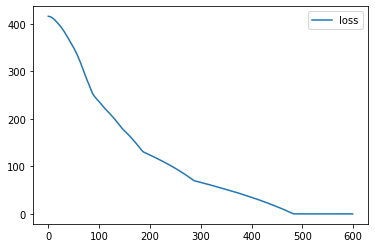

In [209]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();

The following code will implement a stochastic gradient descent to optmize the weights for each food. 

There will be fourteen weights; the inputs are all 1 and the outputs are linear. (The output is the weight). 

If a set of weights for each food meets the criteria, then the loss is 1 multiplied with the total emissions. Otherwise, it is zero multiplied with the green house gas emissions. 

In [245]:
# Define an optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

# Define the weights
# weights = tf.constant(np.random.rand(14))
# weights = tf.random.uniform(shape=[14])
# weights = tf.Variable(tf.random.uniform(shape=[14]))
weights = [] 

for i in range(14):
    weights.append(tf.Variable(np.random.rand()))

print(weights)

# Define a loss function 
# Expects a vector of 14 weights 
def loss_fn():
    x = [] 
    for i in range(14): 
        x.append(weights[i].numpy())
    
    result = get_total_nutrition_np(x, food_values_np)
    
    # If nutrition meets requirements 
    flag = int((result[:-1] == target[:-1]).all())
    
    # Return the check multiplied with total emissions
    
    return flag * result[-1]


# Do the weights need to be of type tf.Variable? 
step_count = sgd.minimize(loss_fn, [weights]).numpy()

[<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.13720815>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.04838968>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.191499>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.34496868>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.607473>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.517452>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.53134847>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.47933504>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.019688362>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.81610334>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.76176506>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.75469273>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.34232885>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.8452505>]


AttributeError: 'numpy.float64' object has no attribute '_id'